In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("bureau_balance.csv")
data.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


## Descriptive Statistics

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [40]:
data["STATUS"].unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

Terdapat satu kolom yang isinya tidak konsisten, yaitu pada kolom "STATUS" yang terdapat huruf dan angka dengan tipe data object.

Kita akan coba handle dengan melakukan penggantian untuk value huruf menjadi angka, seperti: "C" menjadi "6" dan "X" menjadi "7" serta mengubah tipe data menjadi "integer".

In [6]:
data["STATUS"] = data["STATUS"].replace("C", 6)

In [8]:
data["STATUS"] = data["STATUS"].replace("X", 7)

In [13]:
data["STATUS"].unique()

array([6, 0, 7, 1, 2, 3, 5, 4])

In [10]:
data['STATUS'] = data['STATUS'].astype(int)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype
---  ------          -----
 0   SK_ID_BUREAU    int64
 1   MONTHS_BALANCE  int64
 2   STATUS          int32
dtypes: int32(1), int64(2)
memory usage: 520.7 MB


Kita telah berhasil melakukan handling data yang tidak konsisten dengan menyeragamkan formatnya dan menyesuaikan tipe datanya.

In [62]:
data.isna().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

Tidak terdapat kolom yang memiliki nilai kosong (null)

In [65]:
data.describe()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
count,2.729992e+07,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01,4.513079e+00
std,4.923489e+05,2.386451e+01,2.851864e+00
min,5.001709e+06,-9.600000e+01,0.000000e+00
25%,5.730933e+06,-4.600000e+01,0.000000e+00
50%,6.070821e+06,-2.500000e+01,6.000000e+00
75%,6.431951e+06,-1.100000e+01,6.000000e+00
max,6.842888e+06,0.000000e+00,7.000000e+00


Berdasarkan dari nilai summary tidak terdapat nilai yang aneh, dan menurut saya nilai-nilai yang tertera masih normal.

## Univariate Analysis

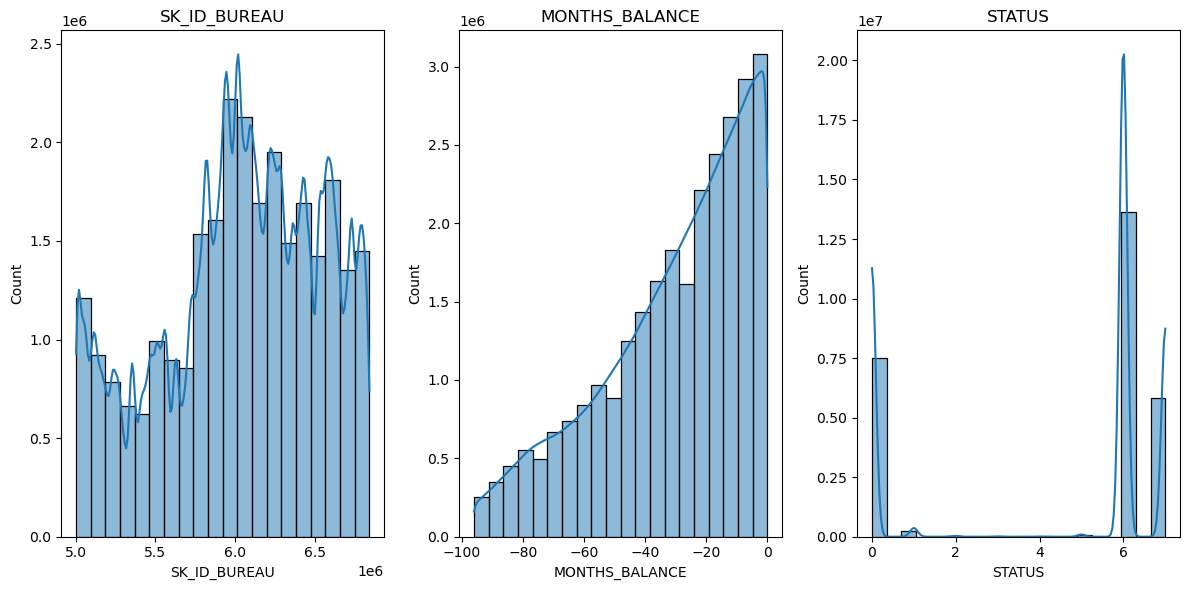

In [75]:
plt.figure(figsize=(12, 6))
for i in range(len(data.columns)):
    plt.subplot(1, len(data.columns), i+1)
    sns.histplot(data=data, x=data.columns[i], bins=20, kde=True)
    plt.title(data.columns[i])
plt.tight_layout()
plt.show()

SK_ID_BUREAU:<br>
Sebagian besar nilai terkonsentrasi pada rentang tertentu, dengan beberapa puncak lokal. Ini menunjukkan adanya beberapa kelompok data yang memiliki nilai SK_ID_BUREAU yang serupa.<br>

MONTHS_BALANCE:<br>
Distribusi data cenderung miring ke kanan (positively skewed), dengan ekor panjang ke arah nilai positif. Ini menunjukkan bahwa sebagian besar nilai MONTHS_BALANCE berada pada rentang negatif, dengan beberapa nilai yang jauh lebih tinggi.<br>
    
STATUS:<br>
Terdapat kumpulan data tertinggi pada kolom **STATUS** seperti pada 0, 6, dan 7.<br>

Note:<br>
Untuk kategori status saat ini kita masih belum bisa untuk menyimpulkan seperti apa.


Kesimpulan:<br>
Banyak nasabah yang tidak suka untuk melakukan cicilan dengan tenor yang lama, hal ini tercerminkan pada data histogram dari **MONTHS_BALANCE**.<br>
us yang sama.

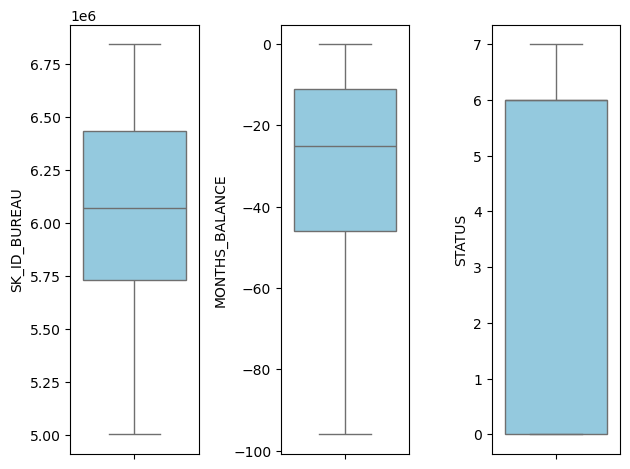

In [19]:
for i in range(0, len(data.columns)):
    plt.subplot(1, len(data.columns), i+1)
    sns.boxplot(data=data, y=data.columns[i], color='skyblue', orient='v')
plt.tight_layout()
plt.show()

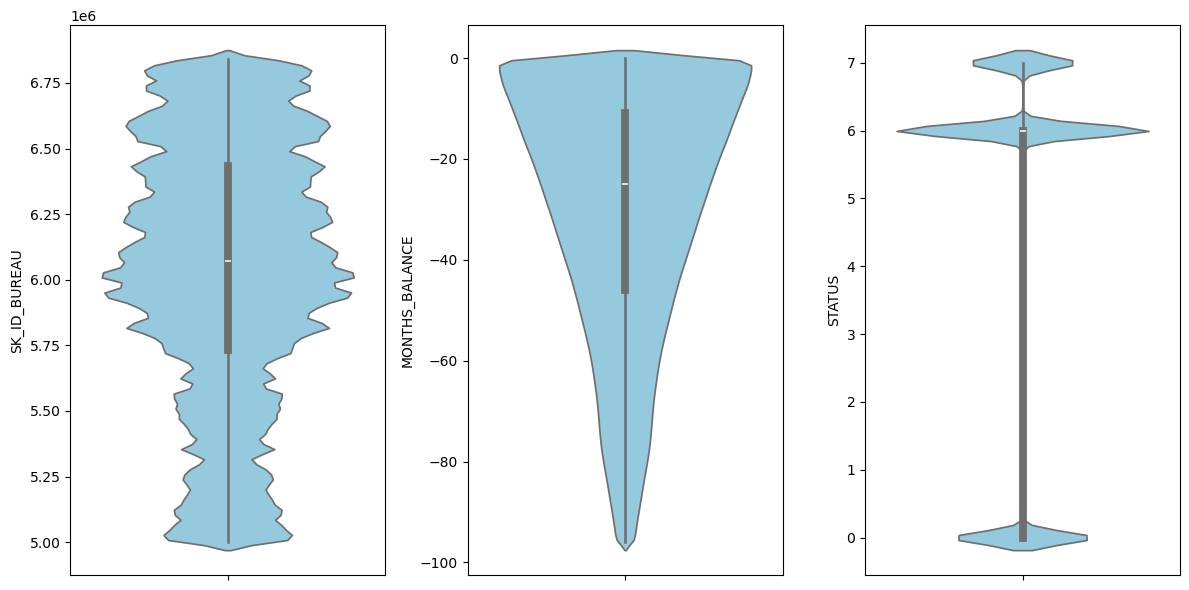

In [23]:
plt.figure(figsize=(12, 6))
for i in range(len(data.columns)):
    plt.subplot(1, len(data.columns), i+1)
    sns.violinplot(data=data, y=data.columns[i], color='skyblue', orient='v')
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(data, diag_kind="kde", hue="STATUS")

## Multivariat Analysis

In [93]:
data.corr()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
SK_ID_BUREAU,1.000000,0.011873,0.004396
MONTHS_BALANCE,0.011873,1.000000,0.048819
STATUS,0.004396,0.048819,1.000000


<Axes: >

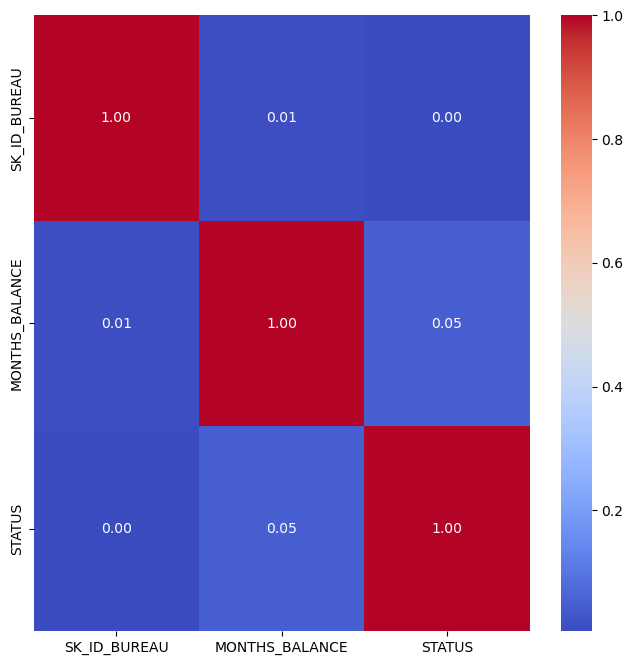

In [17]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt='.2f')

Berdasarkan dari heatmap dapat disimpulkan bahwa korelasi antar fitur sangat lemah atau tidak adanya korelasi antar fitur.

Munkin fitur ini akan lebih memberikan insight jika dikombinasikan dengan data pendukung lainnya lainnya.

## Business Insight

In [22]:
dfg = data.groupby(["STATUS"])["MONTHS_BALANCE"].mean().reset_index()
dfg.sort_values(["MONTHS_BALANCE"], ascending= False)

,STATUS,MONTHS_BALANCE
6,6,-28.170070
0,0,-32.926118
7,7,-33.541386
1,1,-35.380842
5,5,-40.501474
2,2,-48.913361
4,4,-49.732683
3,3,-50.365531


In [24]:
dfc = data.groupby(["STATUS"])["SK_ID_BUREAU"].count().reset_index()
dfc.sort_values(["SK_ID_BUREAU"], ascending=False)

,STATUS,SK_ID_BUREAU
6,6,13646993
0,0,7499507
7,7,5810482
1,1,242347
5,5,62406
2,2,23419
3,3,8924
4,4,5847


In [26]:
dfm = dfg.merge(dfc, on="STATUS")
dfm

,STATUS,MONTHS_BALANCE,SK_ID_BUREAU
0,0,-32.926118,7499507
1,1,-35.380842,242347
2,2,-48.913361,23419
3,3,-50.365531,8924
4,4,-49.732683,5847
5,5,-40.501474,62406
6,6,-28.170070,13646993
7,7,-33.541386,5810482


In [92]:
dfm.describe()

,STATUS,MONTHS_BALANCE,SK_ID_BUREAU
count,8.00000,8.000000,8.000000e+00
mean,3.50000,-39.941433,3.412491e+06
std,2.44949,8.741353,5.115066e+06
min,0.00000,-50.365531,5.847000e+03
25%,1.75000,-49.118192,1.979525e+04
50%,3.50000,-37.941158,1.523765e+05
75%,5.25000,-33.387569,6.232738e+06
max,7.00000,-28.170070,1.364699e+07


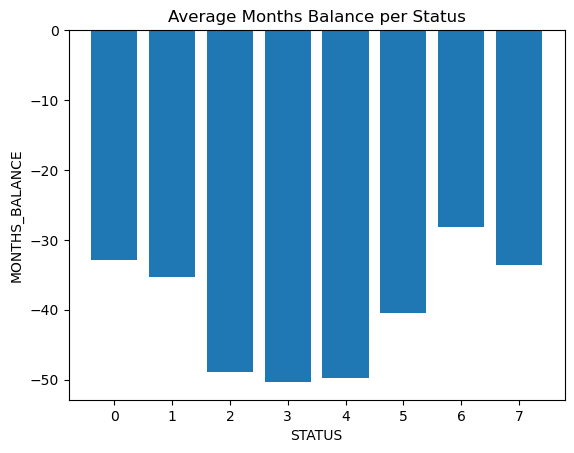

In [35]:
plt.bar(dfm['STATUS'], dfm['MONTHS_BALANCE'])
plt.title('Average Months Balance per Status')
plt.xlabel('STATUS')
plt.ylabel('MONTHS_BALANCE')
plt.show()

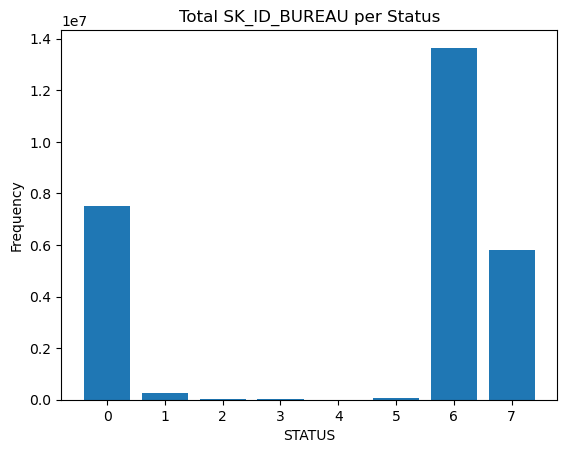

In [37]:
plt.bar(dfm['STATUS'], dfm['SK_ID_BUREAU'])
plt.title('Total SK_ID_BUREAU per Status')
plt.xlabel('STATUS')
plt.ylabel('Frequency')
plt.show()

Berdasarkan dari analisis yang telah kita lakukan didapatkan bahwa nasabah cenderung tidak memilih untuk membayar cicilan dengan tenor yang lebih lama.

Pada MONTHS_BALANCE rata-rata pembayaran dengan ternor tertinggi terdapat pada STATUS 3 sebesar ~50.3 bulan.

Sedangkan pada SK_ID_BUREAU nasabah terbanyak terdapat pada STATUS 6 sebesar ~13646993 nasabah.

Sehingga secara keseluruhan dapat kita simpulkan bahwa nasabah terbanyak terdapat pada STATUS 6 dengan rata-rata tenor pembayaran ~28.1 atau 2,3 tahun. Berdasarkan hal tersebut kita dapat membuat skema untuk membuat program dengan skema cicilan dengan jangka pendek sekitar 2,8 tahun atau 34 bulan.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype
---  ------          -----
 0   SK_ID_BUREAU    int64
 1   MONTHS_BALANCE  int64
 2   STATUS          int32
dtypes: int32(1), int64(2)
memory usage: 520.7 MB


In [17]:
data.to_csv('bureau_balance_clean.csv', index=False)